# Case Study - Sunlight in Austin



## load data from txt file (file path in python)


In Python, backslash is used to signify special characters.
in python, / is use in file path

e.g. "hello\nworld" -- the "\n" means a newline. Try printing it.

Path names on Windows tend to have backslashes in them. But we want them to mean actual backslashes, not special characters.

r stands for "raw" and will cause backslashes in the string to be interpreted as actual backslashes rather than special characters.

e.g. r"hello\nworld" literally means the characters "hello\nworld". Again, try printing it.

More info is in the Python docs, it's a good idea to search them for questions like these.

In [62]:
import pandas as pd

#pd.read_csv('../../../data_folder/data.csv')
#Will go 3 levels up and then into a data_folder (assuming it's there) Or

#df = pd.read_csv(r"C:\Users\t_tan\Documents\DataScienceFolder\datacamp\Pandas foundation\NOAA_QCLCD_2011_hourly_13904.txt", header=None)

df = pd.read_csv('data_folder/NOAA_QCLCD_2011_hourly_13904.txt', header=None)
df.head()




column_labels = 'Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,dry_bulb_faren,dry_bulb_farenFlag,dry_bulb_cel,dry_bulb_celFlag,wet_bulb_faren,wet_bulb_farenFlag,wet_bulb_cel,wet_bulb_celFlag,dew_point_faren,dew_point_farenFlag,dew_point_cel,dew_point_celFlag,relative_humidity,relative_humidityFlag,wind_speed,wind_speedFlag,wind_direction,wind_directionFlag,value_for_wind_character,value_for_wind_characterFlag,station_pressure,station_pressureFlag,pressure_tendency,pressure_tendencyFlag,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk'

#print(list(column_labels))
#column_labels_list = column_labels.split(',')

#print(column_labels_list)

list_to_drop = ['sky_conditionFlag', 'visibilityFlag', 'wx_and_obst_to_vision', 'wx_and_obst_to_visionFlag', 'dry_bulb_farenFlag', 'dry_bulb_celFlag', 'wet_bulb_farenFlag', 'wet_bulb_celFlag', 'dew_point_farenFlag', 'dew_point_celFlag', 'relative_humidityFlag', 'wind_speedFlag', 'wind_directionFlag', 'value_for_wind_character', 'value_for_wind_characterFlag', 'station_pressureFlag', 'pressure_tendencyFlag', 'pressure_tendency', 'presschange', 'presschangeFlag', 'sea_level_pressureFlag', 'hourly_precip', 'hourly_precipFlag', 'altimeter', 'record_type', 'altimeterFlag', 'junk']

# Split on the comma to create a list: column_labels_list
column_labels_list = column_labels.split(',')

# Assign the new column labels to the DataFrame: df.columns
df.columns = column_labels_list

# Remove the appropriate columns: df_dropped
df_dropped = df.drop(list_to_drop,axis='columns')

# Print the output of df_dropped.head()
#print('df_dropped  :', df_dropped.head())



 #-----these create the pandas series here is the date_times to set_index at the end -----

# Convert the date column to string: df_dropped['date']
df_dropped['date'] = df_dropped['date'].astype(str)

# Pad leading zeros to the Time column: df_dropped['Time']
df_dropped['Time'] = df_dropped['Time'].apply(lambda x:'{:0>4}'.format(x))

        ##It means right aligned front pad zeros for any value of x if x has less than 6 digits:

#         s = [(lambda x: f'{x:0>6}')(num) for num  in [4, 45, 123456]]
#         print(s)
#         # ['000004', '000045', '123456']
#         lambda is a nameless function that is used mostly on fly: The lambda expression is equivalents to

#         def padd_zero(x):
#             return f'{x:0>6}'

#         s = [padd_zero(num) for num  in [4, 45, 123456]]
#         print(s)
#         # ['000004', '000045', '123456']
#         In the example df[col].map(abc). abc is applied to all values in col, just as we apply the functions to the list above.

# Concatenate the new date and Time columns: date_string
date_string = df_dropped['date'] + df_dropped['Time']

# Convert the date_string Series to datetime: date_times
date_times = pd.to_datetime(date_string, format='%Y%m%d%H%M')

# Set the index to be the new date_times container: df_clean
df_clean = df_dropped.set_index(date_times)

# Print the output of df_clean.head()
print(df_clean.head())

#check The numeric columns contain missing values labeled as 'M'
print('df_clean.shape')
print(df_clean['dry_bulb_faren'].shape)
print('sum of numeric type in dry_bulb_faren column')
print(df_clean['dry_bulb_faren'].str.isnumeric().sum())
print('that show non-numerice value in this column  = ', ((df_clean['dry_bulb_faren'].shape)-(df_clean['dry_bulb_faren'].str.isnumeric().sum())))

#find the location
print('find the location')
print(df_clean.loc[df_clean.dry_bulb_faren.str.isnumeric() == False] )  # get 268 row as we check


# Print the dry_bulb_faren temperature between 8 AM and 9 AM on June 20, 2011
print(df_clean.loc['2011-jun-20 0800':'2011-jun-20 0900', 'dry_bulb_faren'])

# Convert the dry_bulb_faren column to numeric values: df_clean['dry_bulb_faren']
df_clean['dry_bulb_faren'] = pd.to_numeric(df_clean['dry_bulb_faren'], errors='coerce')

# Print the transformed dry_bulb_faren temperature between 8 AM and 9 AM on June 20, 2011
print(df_clean.loc['2011-jun-20 0800':'2011-jun-20 0900', 'dry_bulb_faren'])


# Convert the wind_speed and dew_point_faren columns to numeric values
df_clean['wind_speed'] = pd.to_numeric(df_clean['wind_speed'], errors='coerce')
df_clean['dew_point_faren'] = pd.to_numeric(df_clean['dew_point_faren'], errors='coerce')

# now ready for EDA : Exploratory data analysis
# print(df_clean.head())
     
# 'data_folder/NOAA_QCLCD_2011_hourly_13904.txt'
# save to csv clean for next task

df_clean.to_csv('data_folder/NOAA_QCLCD_2011_hourly_13904_clean.csv', index=True)

                      Wban      date  Time  StationType sky_condition  \
2011-01-01 00:53:00  13904  20110101  0053           12        OVC045   
2011-01-01 01:53:00  13904  20110101  0153           12        OVC049   
2011-01-01 02:53:00  13904  20110101  0253           12        OVC060   
2011-01-01 03:53:00  13904  20110101  0353           12        OVC065   
2011-01-01 04:53:00  13904  20110101  0453           12        BKN070   

                    visibility dry_bulb_faren dry_bulb_cel wet_bulb_faren  \
2011-01-01 00:53:00      10.00             51         10.6             38   
2011-01-01 01:53:00      10.00             51         10.6             37   
2011-01-01 02:53:00      10.00             51         10.6             37   
2011-01-01 03:53:00      10.00             50         10.0             38   
2011-01-01 04:53:00      10.00             50         10.0             37   

                    wet_bulb_cel dew_point_faren dew_point_cel  \
2011-01-01 00:53:00          3.1

Type Markdown and LaTeX: a2

How to check if float pandas column contains only integer numbers?



In [ ]:
#Comparison with astype(int)
#Tentatively convert your column to int and test with np.array_equal:

np.array_equal(df.v, df.v.astype(int))
True

# float.is_integer
# You can use this python function in conjunction with an apply:

 df.v.apply(float.is_integer).all()
True

# Or, using python's all in a generator comprehension, for space efficiency:

all(x.is_integer() for x in df.v)
True

## Statistis Exploratory data analysis (stat EDA)

In [12]:
# load clean data from file that saved earlier
import pandas as pd
import numpy as np

df_clean = pd.read_csv('data_folder/NOAA_QCLCD_2011_hourly_13904_clean.csv', sep= ',', header= 0, index_col= 0, parse_dates=True)
df_clean.head()
#df_clean.set_index('Wban')



# Print the median of the dry_bulb_faren column
print(df_clean.dry_bulb_faren.median())

# Print the median of the dry_bulb_faren column for the time range '2011-Apr':'2011-Jun'
print(df_clean.loc['2011-Apr':'2011-Jun', 'dry_bulb_faren'].median())

#Print the median of the dry_bulb_faren column for the month of January
print(df_clean.loc['2011-Jan', 'dry_bulb_faren'].median())


#load df_climate from weather_data_Austin_2010.csv

df_climate = pd.read_csv('data_folder/weather_data_austin_2010.csv', sep = ',', header=0, parse_dates=['Date'], index_col='Date')

#df_climate.head()



# Downsample df_clean by day and aggregate by mean: daily_mean_2011
daily_mean_2011 = df_clean.resample('D').mean()

# Extract the dry_bulb_faren column from daily_mean_2011 using .values: daily_temp_2011
daily_temp_2011 = daily_mean_2011.dry_bulb_faren.values

# Downsample df_climate by day and aggregate by mean: daily_climate

daily_climate = df_climate.resample('D').mean()

# Extract the Temperature column from daily_climate using .reset_index(): daily_temp_climate
daily_temp_climate = daily_climate.reset_index()['Temperature']      # re_index() whole df and select column with [' '] later

# Compute the difference between the two arrays and print the mean difference
difference = daily_temp_2011 - daily_temp_climate

print('difference mean between temp 2011 and temp 2010  :', difference.mean())


72.0
78.0
48.0
difference mean between temp 2011 and temp 2010  : 1.3301831870056482


In [104]:
df_climate = pd.read_csv('data_folder/weather_data_austin_2010.csv', sep = ',', header=0, parse_dates=['Date'], index_col='Date')

df_climate.head()

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,44.1,36.9,1.0
2010-01-01 03:00:00,43.8,36.9,1.0
2010-01-01 04:00:00,43.5,36.8,1.0


In [7]:
import pandas as pd
import numpy as np
df_clean = pd.read_csv('data_folder/NOAA_QCLCD_2011_hourly_13904_clean.csv', sep= ',', header= 0, index_col= 0, parse_dates=True)
df_clean.head()



,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01 00:53:00,13904,20110101,53,12,OVC045,10.00,51.0,10.6,38,3.1,15.0,-9.4,24,15.0,360,29.42,29.95
2011-01-01 01:53:00,13904,20110101,153,12,OVC049,10.00,51.0,10.6,37,3.0,14.0,-10.0,23,10.0,340,29.49,30.01
2011-01-01 02:53:00,13904,20110101,253,12,OVC060,10.00,51.0,10.6,37,2.9,13.0,-10.6,22,15.0,010,29.49,30.01
2011-01-01 03:53:00,13904,20110101,353,12,OVC065,10.00,50.0,10.0,38,3.1,17.0,-8.3,27,7.0,350,29.51,30.03
2011-01-01 04:53:00,13904,20110101,453,12,BKN070,10.00,50.0,10.0,37,2.8,15.0,-9.4,25,11.0,020,29.51,30.04


In [22]:
import pandas as pd
import numpy as np

df_clean = pd.read_csv('data_folder/NOAA_QCLCD_2011_hourly_13904_clean.csv', sep= ',', header= 0, index_col= 0, parse_dates=True)

# df_clean.info()
# df_clean[0].rename
# df_clean.set_index('Timestamp')

# Using df_clean, when is sky_condition 'CLR'?
is_sky_clear = df_clean['sky_condition'] == 'CLR'

# Filter df_clean using is_sky_clear
sun = df_clean.loc[is_sky_clear]

# # Resample sunny by day then calculate the max
# sunny_daily_max = sun.resample('D').max()
# print(sunny_daily_max)
# # See the result
# sunny_daily_max.head()


# Using df_clean, when does sky_condition contain 'OVC'?
is_sky_overcast = df_clean['sky_condition'].str.contains('OVC')

# Filter df_clean using is_sky_overcast
overcast = df_clean.loc[is_sky_overcast]

# # Resample overcast by day then calculate the max
# overcast_daily_max = overcast.resample('D').max()

# # See the result
# overcast_daily_max.head()


# Calculate the mean of sunny_daily_max
sunny_daily_max_mean = sun.mean()

# Calculate the mean of overcast_daily_max
overcast_daily_max_mean = overcast.mean()

# Print the difference (sunny minus overcast)
print(sunny_daily_max_mean - overcast_daily_max_mean)
df_clean.info()

StationType          0.000000
Time               279.446462
Wban                 0.000000
date                99.294543
dew_point_faren     -7.349561
dry_bulb_faren       3.475075
wet_bulb_faren            NaN
wind_speed          -3.240583
dtype: float64
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10337 entries, 2011-01-01 00:53:00 to 2011-12-31 23:53:00
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wban                10337 non-null  int64  
 1   date                10337 non-null  int64  
 2   Time                10337 non-null  int64  
 3   StationType         10337 non-null  int64  
 4   sky_condition       10337 non-null  object 
 5   visibility          10325 non-null  object 
 6   dry_bulb_faren      10326 non-null  float64
 7   dry_bulb_cel        10337 non-null  object 
 8   wet_bulb_faren      10337 non-null  object 
 9   wet_bulb_cel        10337 non-null  object 
 10  dew_poin

In [25]:
import pandas as pd
import numpy as np

df_clean = pd.read_csv('data_folder/NOAA_QCLCD_2011_hourly_13904_clean.csv', sep= ',', header= 0, index_col= 0, parse_dates=True)


# From previous steps
is_sky_clear = df_clean['sky_condition']=='CLR'
sunny = df_clean.loc[is_sky_clear]
sunny_daily_max = sunny.dry_bulb_faren.resample('D').max()
is_sky_overcast = df_clean['sky_condition'].str.contains('OVC')
overcast = df_clean.loc[is_sky_overcast]
overcast_daily_max = overcast.dry_bulb_faren.resample('D').max()

# Calculate the mean of sunny_daily_max
sunny_daily_max_mean = sunny_daily_max.mean()

# Calculate the mean of overcast_daily_max
print(sunny_daily_max_mean - overcast_daily_max_mean)


6.5043040293040235


## Visual EDA

            visibility  dry_bulb_faren
2011-01-02   10.000000       44.791667
2011-01-09    8.275785       50.246637
2011-01-16    6.451651       41.103774
2011-01-23    8.370853       47.194313
2011-01-30    9.966851       53.486188
2011-02-06    9.242647       38.235294
2011-02-13    9.281768       40.082873
2011-02-20    8.711134       65.100840
2011-02-27    8.154206       64.976636
2011-03-06    9.795580       57.707182
2011-03-13    9.633166       62.180905
2011-03-20    9.687204       67.933649
2011-03-27    9.684466       70.941748
2011-04-03    7.510664       65.336493
2011-04-10    9.069767       71.209302
2011-04-17    9.623656       68.881720
2011-04-24    8.831731       79.418269
2011-05-01    8.962500       75.705000
2011-05-08    9.668394       66.689119
2011-05-15    8.618357       73.801932
2011-05-22    8.214932       77.208145
2011-05-29    8.969251       82.556150
2011-06-05    9.653846       82.143541
2011-06-12    9.591837       83.316327
2011-06-19    9.959184   

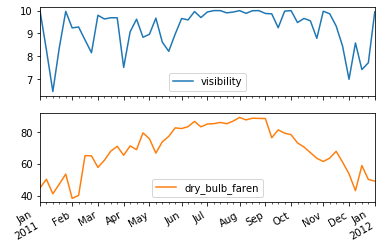

In [46]:
import pandas as pd
import numpy as np
df_clean = pd.read_csv('data_folder/NOAA_QCLCD_2011_hourly_13904_clean.csv', sep= ',', header= 0, index_col= 0, parse_dates=True)
# print(df_clean.head())
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# convert column visibility from object to float before resample
df_clean['visibility'] = pd.to_numeric(df_clean['visibility'],errors= 'coerce')


# Select the visibility and dry_bulb_faren columns and resample them: weekly_mean
weekly_mean = df_clean[['visibility', 'dry_bulb_faren']].resample('W').mean()
print(weekly_mean)





# vi_mean = df_clean.visibility.resample('W').mean()
# print(vi_mean)

# Print the output of weekly_mean.corr()
print(weekly_mean.corr())
print(type(weekly_mean.corr()))
# wmean_corr = weekly_mean.corr()
# # pearson_corr = weekly_mean.corr().iloc[[0],[1]]
# pearson_corr = wmean_corr.at(['visibility'],['dry_bulb_faren'])

print('Pearson corr of visibility and dry_bulb_faren at index [[0],[1]]')
# Plot weekly_mean with subplots=True
weekly_mean.plot(subplots=True)
plt.show()







## Daily hours of clear sky visaul with box plot

2011-01-01    11.0
2011-01-02     7.0
2011-01-03     3.0
2011-01-04     0.0
2011-01-05     1.0
              ... 
2011-12-27    24.0
2011-12-28     7.0
2011-12-29    14.0
2011-12-30    18.0
2011-12-31    12.0
Freq: D, Name: sky_condition, Length: 365, dtype: float64
2011-01-01    24
2011-01-02    24
2011-01-03    26
2011-01-04    49
2011-01-05    29
              ..
2011-12-27    24
2011-12-28    24
2011-12-29    25
2011-12-30    24
2011-12-31    24
Freq: D, Name: sky_condition, Length: 365, dtype: int64


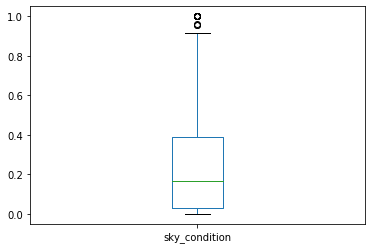

In [55]:
import pandas as pd
import numpy as np
df_clean = pd.read_csv('data_folder/NOAA_QCLCD_2011_hourly_13904_clean.csv', sep= ',', header= 0, index_col= 0, parse_dates=True)
# print(df_clean.head())
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
# df_clean.sky_condition.astype(str)


# 
is_sky_clear = df_clean['sky_condition'] == 'CLR'
resampled = is_sky_clear.resample('D')


sunny_hours = resampled.sum()
print(sunny_hours)
total_hours = resampled.count()
print(total_hours)
sunny_fraction = sunny_hours / total_hours

# Make a box plot of sunny_fraction
sunny_fraction.plot(kind='box')
plt.show()

## Heat or humidity

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10337 entries, 2011-01-01 00:53:00 to 2011-12-31 23:53:00
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wban                10337 non-null  int64  
 1   date                10337 non-null  int64  
 2   Time                10337 non-null  int64  
 3   StationType         10337 non-null  int64  
 4   sky_condition       10337 non-null  object 
 5   visibility          10325 non-null  object 
 6   dry_bulb_faren      10326 non-null  float64
 7   dry_bulb_cel        10337 non-null  object 
 8   wet_bulb_faren      10337 non-null  object 
 9   wet_bulb_cel        10337 non-null  object 
 10  dew_point_faren     10323 non-null  float64
 11  dew_point_cel       10337 non-null  object 
 12  relative_humidity   10337 non-null  object 
 13  wind_speed          10318 non-null  float64
 14  wind_direction      10337 non-null  object 
 15  station_pressure  

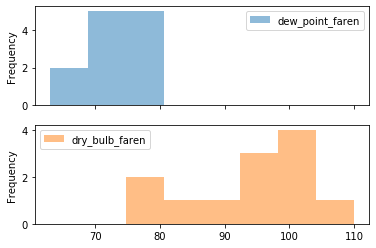

In [68]:
import pandas as pd
import numpy as np
df_clean = pd.read_csv('data_folder/NOAA_QCLCD_2011_hourly_13904_clean.csv', sep= ',', header= 0, index_col= 0, parse_dates=True)

# df_clean[['dew_point_faren', 'dry_bulb_faren']].astype(float)

print(df_clean.info())
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt


monthly_max = df_clean[['dew_point_faren', 'dry_bulb_faren']].resample('M').max()
print(monthly_max)
# Generate a histogram with bins=8, alpha=0.5, subplots=True

monthly_max.plot(kind ='hist', bins=8, alpha=0.5, subplots=True)
plt.show()


## Probability of high temperatures

august_max   : 95.3 F
august_2011  : 
 2011-08-01    103.0
2011-08-02    103.0
2011-08-03    103.0
2011-08-04    104.0
2011-08-05    103.0
2011-08-06    102.0
2011-08-07    102.0
2011-08-08    103.0
2011-08-09    103.0
2011-08-10    102.0
2011-08-11    101.0
2011-08-12    100.0
2011-08-13     96.0
2011-08-14    101.0
2011-08-15    103.0
2011-08-16    102.0
2011-08-17    100.0
2011-08-18    104.0
2011-08-19    103.0
2011-08-20    104.0
2011-08-21    102.0
2011-08-22    103.0
2011-08-23    102.0
2011-08-24    102.0
2011-08-25     93.0
2011-08-26    101.0
2011-08-27    107.0
2011-08-28    110.0
2011-08-29    107.0
2011-08-30    103.0
2011-08-31    100.0
Freq: D, Name: dry_bulb_faren, dtype: float64
august_2011_high   : 
 2011-08-01    103.0
2011-08-02    103.0
2011-08-03    103.0
2011-08-04    104.0
2011-08-05    103.0
2011-08-06    102.0
2011-08-07    102.0
2011-08-08    103.0
2011-08-09    103.0
2011-08-10    102.0
2011-08-11    101.0
2011-08-12    100.0
2011-08-13     96.0
2011-08-14  

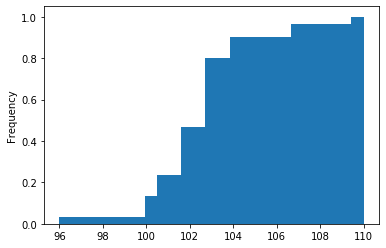

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_clean = pd.read_csv('data_folder/NOAA_QCLCD_2011_hourly_13904_clean.csv', sep= ',', header= 0, index_col= 0, parse_dates=True)

df_climate = pd.read_csv('data_folder/weather_data_austin_2010.csv', sep = ',', header=0, parse_dates=['Date'], index_col='Date')
# print(df_climate.head())

# Extract the maximum temperature in August 2010 from df_climate: august_max
# august_max = df_climate.Temperature.loc['2010-Aug'].max()  : same result

august_max = df_climate.loc['2010-Aug', 'Temperature'].max()

print('august_max   :', august_max, 'F')


# Resample August 2011 temps in df_clean by day & aggregate the max value: august_2011
august_2011 = df_clean.loc['2011-aug', 'dry_bulb_faren'].resample('D').max()
print('august_2011  : \n', august_2011)     # \n use to do new line inside string ' \n '


# Filter for days in august_2011 where the value exceeds august_max: august_2011_high

august_2011_high = august_2011.loc[august_2011 > august_max]    # use mask filter wiht loc method
print('august_2011_high   : \n', august_2011_high)
print(august_2011.count())
print(august_2011_high.count())
print('diff day hot :', (august_2011.count() - august_2011_high.count()))

print( 'will see remain ', august_2011_high.count() , 'days that temperature higher than august_max(95.3 F) from ')
# Construct a CDF of august_2011_high
august_2011_high.plot(kind = 'hist', density= True, cumulative=True, bins=25)
plt.show()
